In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings

warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv('data/feature_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) 

In [4]:
data = raw_data.drop(columns=['ID'])
data

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  Spent  Children  Living_With  Customer_For  Family_Size  Is_Parent
0             2  58138.0        0         0       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1   57   1617         0            0           663            1          0
1             2  46344.0        1         1       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   60     27         2            0           113            3          1
2             2  71613.0        0         0       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   49    776         0            1           312            2          0
3             2  26646.0        1         0       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   30     53         1            1           139            3          1
4             4  58293.0        1         0       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   33    422         1            1           161            3          1
...         ...      ...      ...       ...      ...       ...        ...              ...              ...               ...           ...                ...              ...                  ...                ...                ...           ...           ...           ...           ...           ...       ...       ...  ...    ...       ...          ...           ...          ...        ...
2207          2  61223.0        0         1       46       709         43              182               42               118           247                  2                9                    3                  4                  5             0             0             0             0             0         0         0   47   1341         1            1           381            3          1
2208          4  64014.0        2         1       56       406          0               30                0                 0             8                  7                8                    2                  5                  7             0             0             0             1             0         0         0   68    444         3            1            19            5          1
2209          2  56981.0        0         0       91       908         48              217               32                12            24                  1                2                    3                 13                  6             0             1             0             0             0         0         0   33   1241         0            0           155            1          0
2210          3  69245.0  

In [5]:
data.describe()

Education         Income      Kidhome     Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response          Age        Spent     Children  Living_With  Customer_For  Family_Size    Is_Parent
count  2212.000000    2212.000000  2212.000000  2212.000000  2212.000000  2212.000000  2212.000000      2212.000000      2212.000000       2212.000000   2212.000000        2212.000000      2212.000000          2212.000000        2212.000000        2212.000000   2212.000000   2212.000000   2212.000000   2212.000000   2212.000000  2212.000000  2212.000000  2212.000000  2212.000000  2212.000000  2212.000000   2212.000000  2212.000000  2212.000000
mean      2.460669   51958.810579     0.441682     0.505877    49.019439   305.287523    26.329566       167.029837        37.648734         27.046564     43.925859           2.324593         4.088156             2.672242           5.806510           5.321429      0.073689      0.074141      0.072785      0.064195      0.013562     0.009042     0.150542    45.086347   607.268083     0.947559     0.645570    353.714286     2.593128     0.714286
std       1.004193   21527.278844     0.536955     0.544253    28.943121   337.322940    39.744052       224.254493        54.772033         41.090991     51.706981           1.924507         2.742187             2.927542           3.250939           2.425597      0.261323      0.262060      0.259842      0.245156      0.115691     0.094678     0.357683    11.701599   602.513364     0.749466     0.478449    202.494886     0.906236     0.451856
min       0.000000    1730.000000     0.000000     0.000000     0.000000     0.000000     0.000000         0.000000         0.000000          0.000000      0.000000           0.000000         0.000000             0.000000           0.000000           0.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000     0.000000    18.000000     5.000000     0.000000     0.000000      0.000000     1.000000     0.000000
25%       2.000000   35233.500000     0.000000     0.000000    24.000000    24.000000     2.000000        16.000000         3.000000          1.000000      9.000000           1.000000         2.000000             0.000000           3.000000           3.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000     0.000000    37.000000    69.000000     0.000000     0.000000    180.000000     2.000000     0.000000
50%       2.000000   51371.000000     0.000000     0.000000    49.000000   175.500000     8.000000        68.000000        12.000000          8.000000     24.500000           2.000000         4.000000             2.000000           5.000000           6.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000     0.000000    44.000000   397.000000     1.000000     1.000000    356.000000     3.000000     1.000000
75%       3.000000   68487.000000     1.000000     1.000000    74.000000   505.000000    33.000000       232.250000        50.000000         33.000000     56.000000           3.000000         6.000000             4.000000           8.000000           7.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000     0.000000    55.000000  1048.000000     1.000000     1.000000    529.000000     3.000000     1.000000
max       4.000000  162397.000000     2.000000     2.000000    99.000000  1493.000000   199.000000      1725.000000       259.000000        262.000000    321.000000          15.000000        27.000000            28.000000          13.000000          20.000000      1.000000      1.000000      1.000000      1.000000      1.000000     1.000000     1.000000    74.000000  2525.000000     3.000000     1.000000    699.000000    

In [6]:
columns_to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 
                   'AcceptedCmp2', 'NumDealsPurchases', 'NumWebVisitsMonth', 'Kidhome', 'Teenhome', 'Complain', 'Living_With']

data = data.drop(columns=columns_to_drop)
data

Education   Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  Response  Age  Spent  Children  Customer_For  Family_Size  Is_Parent
0             2  58138.0       58       635         88              546              172                88            88                8                   10                  4         1   57   1617         0           663            1          0
1             2  46344.0       38        11          1                6                2                 1             6                1                    1                  2         0   60     27         2           113            3          1
2             2  71613.0       26       426         49              127              111                21            42                8                    2                 10         0   49    776         0           312            2          0
3             2  26646.0       26        11          4               20               10                 3             5                2                    0                  4         0   30     53         1           139            3          1
4             4  58293.0       94       173         43              118               46                27            15                5                    3                  6         0   33    422         1           161            3          1
...         ...      ...      ...       ...        ...              ...              ...               ...           ...              ...                  ...                ...       ...  ...    ...       ...           ...          ...        ...
2207          2  61223.0       46       709         43              182               42               118           247                9                    3                  4         0   47   1341         1           381            3          1
2208          4  64014.0       56       406          0               30                0                 0             8                8                    2                  5         0   68    444         3            19            5          1
2209          2  56981.0       91       908         48              217               32                12            24                2                    3                 13         0   33   1241         0           155            1          0
2210          3  69245.0        8       428         30              214               80                30            61                6                    5                 10         0   58    843         1           156            3          1
2211          4  52869.0       40        84          3               61                2                 1            21                3                    1                  4         1   60    172         2           622            4          1

[2212 rows x 19 columns]

In [7]:
def apply_scaler(data, scaler):  
    scaled_data = scaler.fit_transform(data)
    return scaled_data

In [8]:
data_scaled = apply_scaler(data, StandardScaler())
data_scaled

array([[-0.4588495 ,  0.28710487,  0.31035323, ...,  1.5277208 ,
        -1.75835869, -1.58113883],
       [-0.4588495 , -0.26088203, -0.38081349, ..., -1.18901134,
         0.44907004,  0.63245553],
       [-0.4588495 ,  0.9131964 , -0.79551352, ..., -0.20604826,
        -0.65464433, -1.58113883],
       ...,
       [-0.4588495 ,  0.23334696,  1.45077832, ..., -0.98155179,
        -1.75835869, -1.58113883],
       [ 0.53720065,  0.80317156, -1.41756357, ..., -0.97661228,
         0.44907004,  0.63245553],
       [ 1.5332508 ,  0.04229031, -0.31169682, ...,  1.32520077,
         1.55278441,  0.63245553]])

In [9]:
pca_df = pd.DataFrame(data_scaled)

# Khởi tạo PCA với số thành phần chính là 3
pca = PCA(n_components=3)

# Thực hiện PCA
pca_result = pca.fit_transform(pca_df)

# Tạo DataFrame mới từ kết quả PCA
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])

# Kiểm tra kết quả
print(pca_df.head())

        PC1       PC2       PC3
0  5.367009 -0.952652  0.188907
1 -2.878651  0.236570  0.230794
2  2.193686 -0.596812 -0.002166
3 -2.696960 -1.086757 -0.200122
4 -0.421434  0.525098 -0.075022


Elbow Method to determine the number of clusters to be formed:


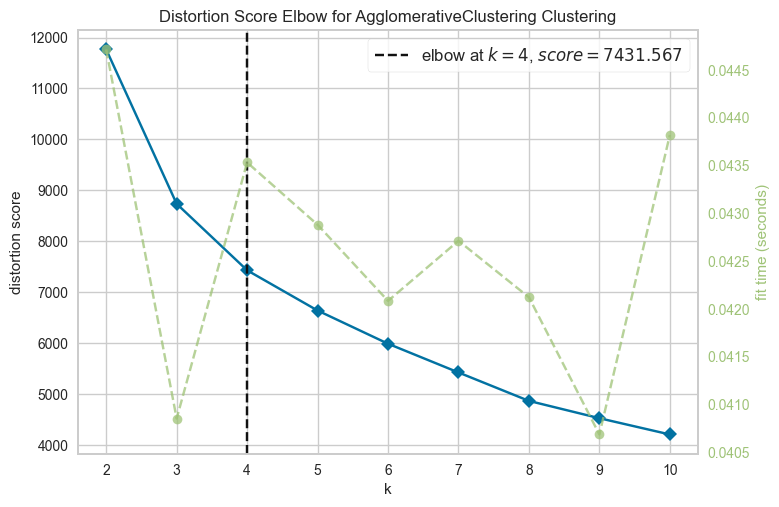

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(pca_df)
Elbow_M.show()

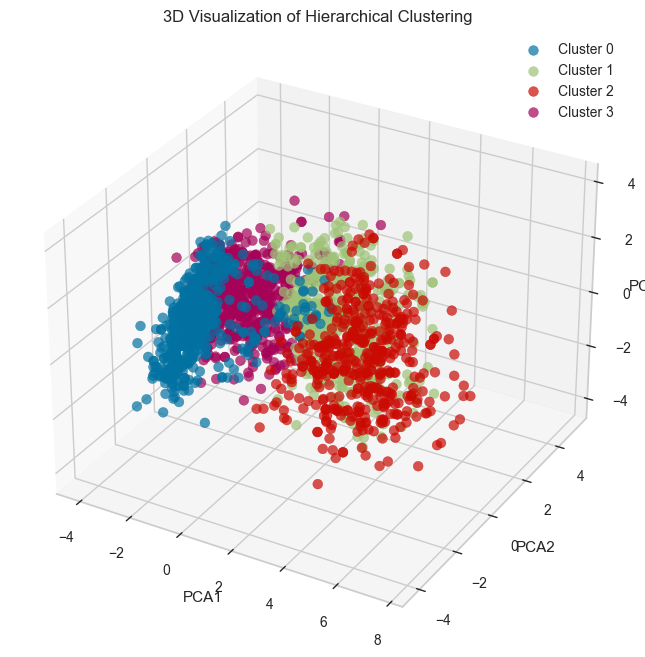

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
pca_df['Cluster'] = hierarchical.fit_predict(pca_df)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(4):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
               label=f'Cluster {cluster}', s=50, alpha=0.7)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()
ax.set_title('3D Visualization of Hierarchical Clustering')
plt.show()

In [12]:
data['Cluster'] = pca_df['Cluster'].values
data

Education   Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  Response  Age  Spent  Children  Customer_For  Family_Size  Is_Parent  Cluster
0             2  58138.0       58       635         88              546              172                88            88                8                   10                  4         1   57   1617         0           663            1          0        2
1             2  46344.0       38        11          1                6                2                 1             6                1                    1                  2         0   60     27         2           113            3          1        3
2             2  71613.0       26       426         49              127              111                21            42                8                    2                 10         0   49    776         0           312            2          0        2
3             2  26646.0       26        11          4               20               10                 3             5                2                    0                  4         0   30     53         1           139            3          1        0
4             4  58293.0       94       173         43              118               46                27            15                5                    3                  6         0   33    422         1           161            3          1        3
...         ...      ...      ...       ...        ...              ...              ...               ...           ...              ...                  ...                ...       ...  ...    ...       ...           ...          ...        ...      ...
2207          2  61223.0       46       709         43              182               42               118           247                9                    3                  4         0   47   1341         1           381            3          1        1
2208          4  64014.0       56       406          0               30                0                 0             8                8                    2                  5         0   68    444         3            19            5          1        3
2209          2  56981.0       91       908         48              217               32                12            24                2                    3                 13         0   33   1241         0           155            1          0        2
2210          3  69245.0        8       428         30              214               80                30            61                6                    5                 10         0   58    843         1           156            3          1        1
2211          4  52869.0       40        84          3               61                2                 1            21                3                    1                  4         1   60    172         2           622            4          1        3

[2212 rows x 20 columns]

In [13]:
raw_data['Cluster'] = pca_df['Cluster'].values
raw_data


ID  Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  Spent  Children  Living_With  Customer_For  Family_Size  Is_Parent  Cluster
0      5524          2  58138.0        0         0       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1   57   1617         0            0           663            1          0        2
1      2174          2  46344.0        1         1       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   60     27         2            0           113            3          1        3
2      4141          2  71613.0        0         0       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   49    776         0            1           312            2          0        2
3      6182          2  26646.0        1         0       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   30     53         1            1           139            3          1        0
4      5324          4  58293.0        1         0       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   33    422         1            1           161            3          1        3
...     ...        ...      ...      ...       ...      ...       ...        ...              ...              ...               ...           ...                ...              ...                  ...                ...                ...           ...           ...           ...           ...           ...       ...       ...  ...    ...       ...          ...           ...          ...        ...      ...
2207  10870          2  61223.0        0         1       46       709         43              182               42               118           247                  2                9                    3                  4                  5             0             0             0             0             0         0         0   47   1341         1            1           381            3          1        1
2208   4001          4  64014.0        2         1       56       406          0               30                0                 0             8                  7                8                    2                  5                  7             0             0             0             1             0         0         0   68    444         3            1            19            5          1        3
2209   7270          2  56981.0        0         0       91       908         48              217               32                12            24                  1                2                    3                 13                  6             0             1             0

In [14]:
cluster_summary = raw_data.groupby('Cluster').mean()
print(cluster_summary)


                  ID  Education        Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response        Age        Spent  Children  Living_With  Customer_For  Family_Size  Is_Parent
Cluster                                                                                                                                                                                                                                                                                                                                                                                                                                            
0        5694.208668   2.247191  32032.194222  0.611557  0.146067  46.313002   50.717496   6.406100        28.881220         9.7

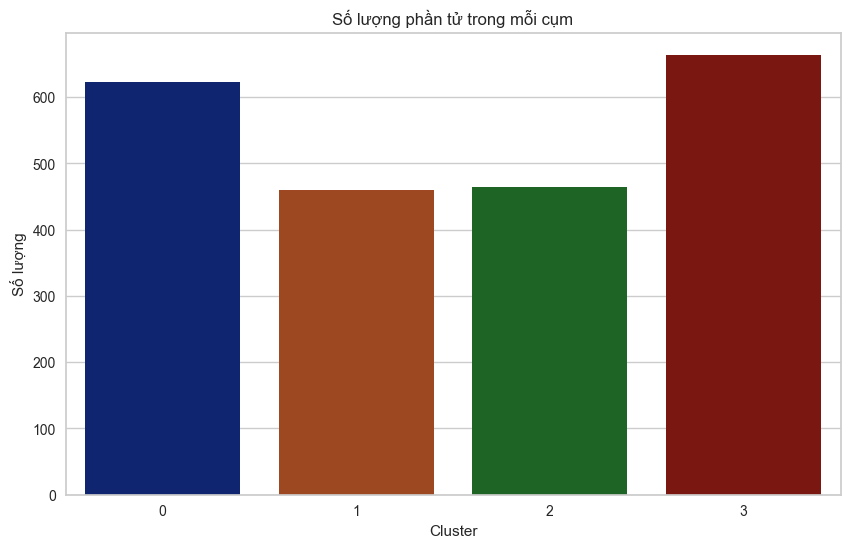

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=raw_data, palette='dark')
plt.title('Số lượng phần tử trong mỗi cụm')
plt.xlabel('Cluster')
plt.ylabel('Số lượng')
plt.show()


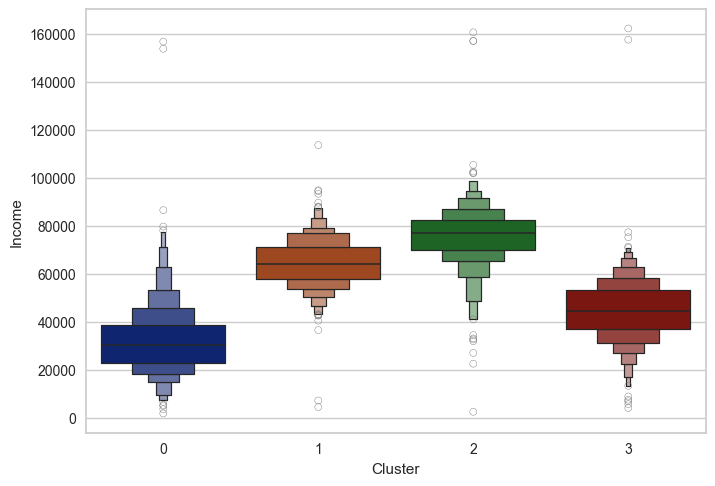

In [16]:
plt.figure()
pl = sns.boxenplot(x=data["Cluster"], y=data["Income"], palette='dark')
plt.show()


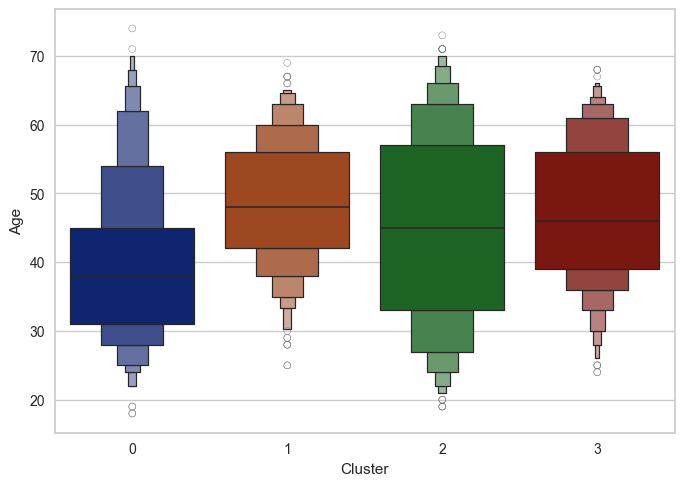

In [17]:
plt.figure()
pl=sns.boxenplot(x=data["Cluster"], y=data["Age"], palette='dark')
plt.show()

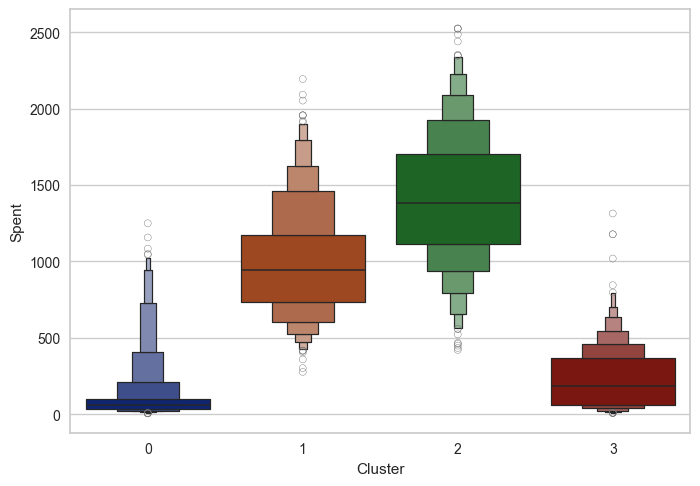

In [18]:
plt.figure()
pl=sns.boxenplot(x=data["Cluster"], y=data["Spent"], palette='dark')
plt.show()

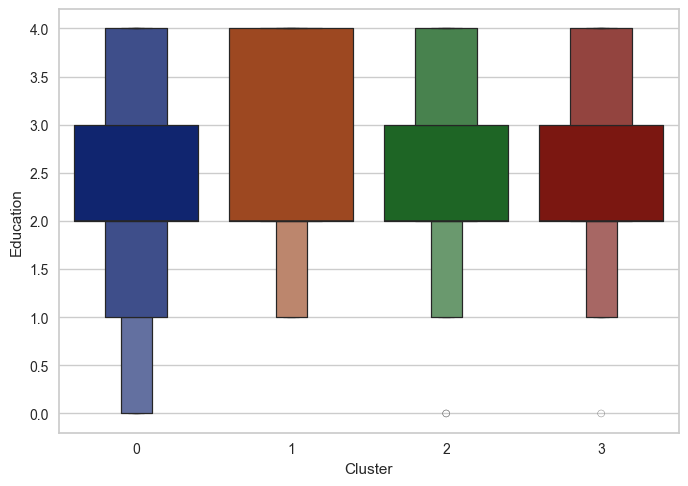

In [19]:
plt.figure()
# pl=sns.swarmplot(x=data["Cluster"], y=data["Education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Cluster"], y=data["Education"], palette='dark')
plt.show()

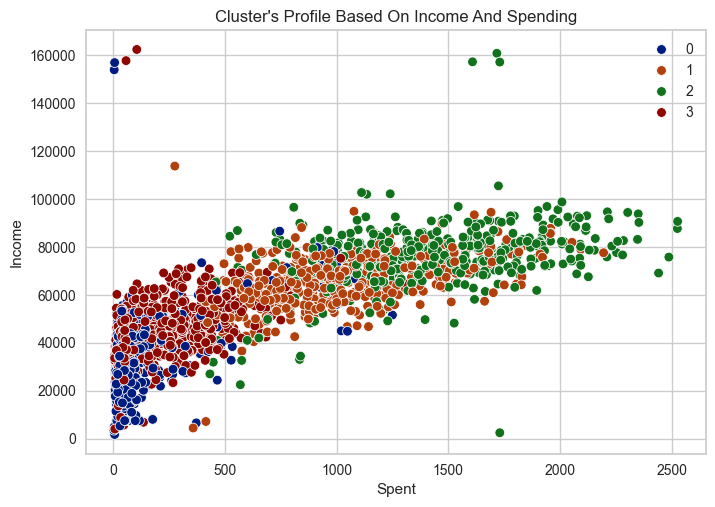

In [20]:
pl = sns.scatterplot(data = raw_data,x=raw_data["Spent"], y=raw_data["Income"],hue=raw_data["Cluster"], palette='dark')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

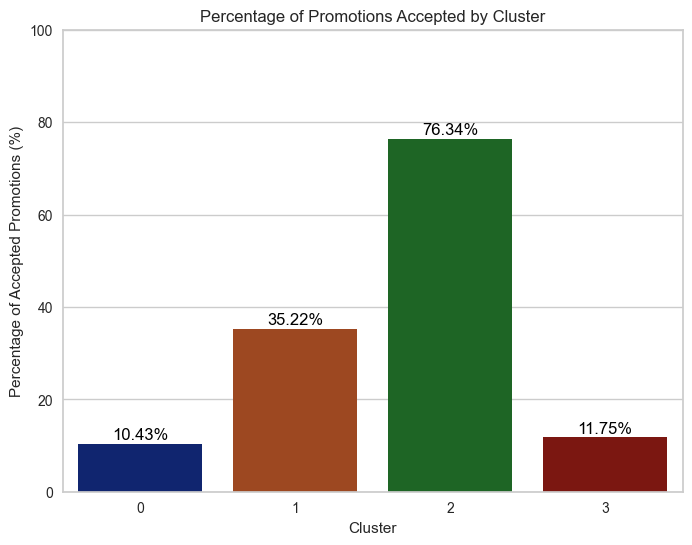

In [21]:
raw_data["Total_Promos"] = (
    raw_data["AcceptedCmp1"] + 
    raw_data["AcceptedCmp2"] + 
    raw_data["AcceptedCmp3"] + 
    raw_data["AcceptedCmp4"] + 
    raw_data["AcceptedCmp5"]
)

cluster_total = raw_data.groupby("Cluster")["ID"].count()

cluster_promos = raw_data.groupby("Cluster")["Total_Promos"].sum()

percentage_promos = (cluster_promos / cluster_total) * 100

percentage_df = percentage_promos.reset_index()
percentage_df.columns = ["Cluster", "Percentage"]

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=percentage_df, x="Cluster", y="Percentage", palette="dark")

for index, row in percentage_df.iterrows():
    ax.text(
        index,
        row["Percentage"] + 1,
        f'{row["Percentage"]:.2f}%',
        color='black',
        ha="center" 
    )

plt.title("Percentage of Promotions Accepted by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Percentage of Accepted Promotions (%)")
plt.ylim(0, 100)
plt.show()


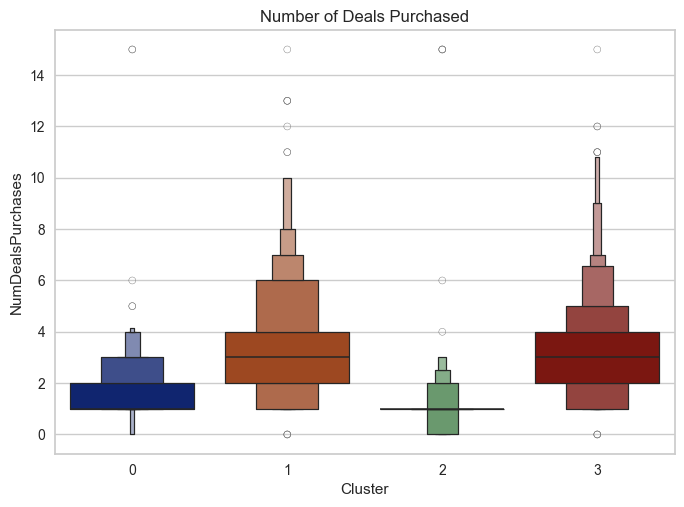

In [22]:
plt.figure()
pl=sns.boxenplot(y=raw_data["NumDealsPurchases"],x=raw_data["Cluster"], palette= 'dark')
pl.set_title("Number of Deals Purchased")
plt.show()

In [23]:
def plot_kde_grid(data, personal_vars, ydata, cluster_col, palette="dark", grid_shape=(5,3), figsize=(20, 20)):
    fig, axes = plt.subplots(nrows=grid_shape[0], ncols=grid_shape[1], figsize=figsize)
    axes = axes.flatten()

    for idx, var in enumerate(personal_vars):
        if idx < len(axes):
            sns.kdeplot(
                x=data[var],
                y=data[ydata],
                hue=data[cluster_col],
                palette=palette,
                ax=axes[idx]
            )
            axes[idx].set_title(f"{var} vs {ydata}")

    for i in range(len(personal_vars), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


In [24]:
Personal = ["Income", "Customer_For", "Age", "Family_Size", "Education", "Kidhome", "Teenhome", "Children", "Living_With", 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

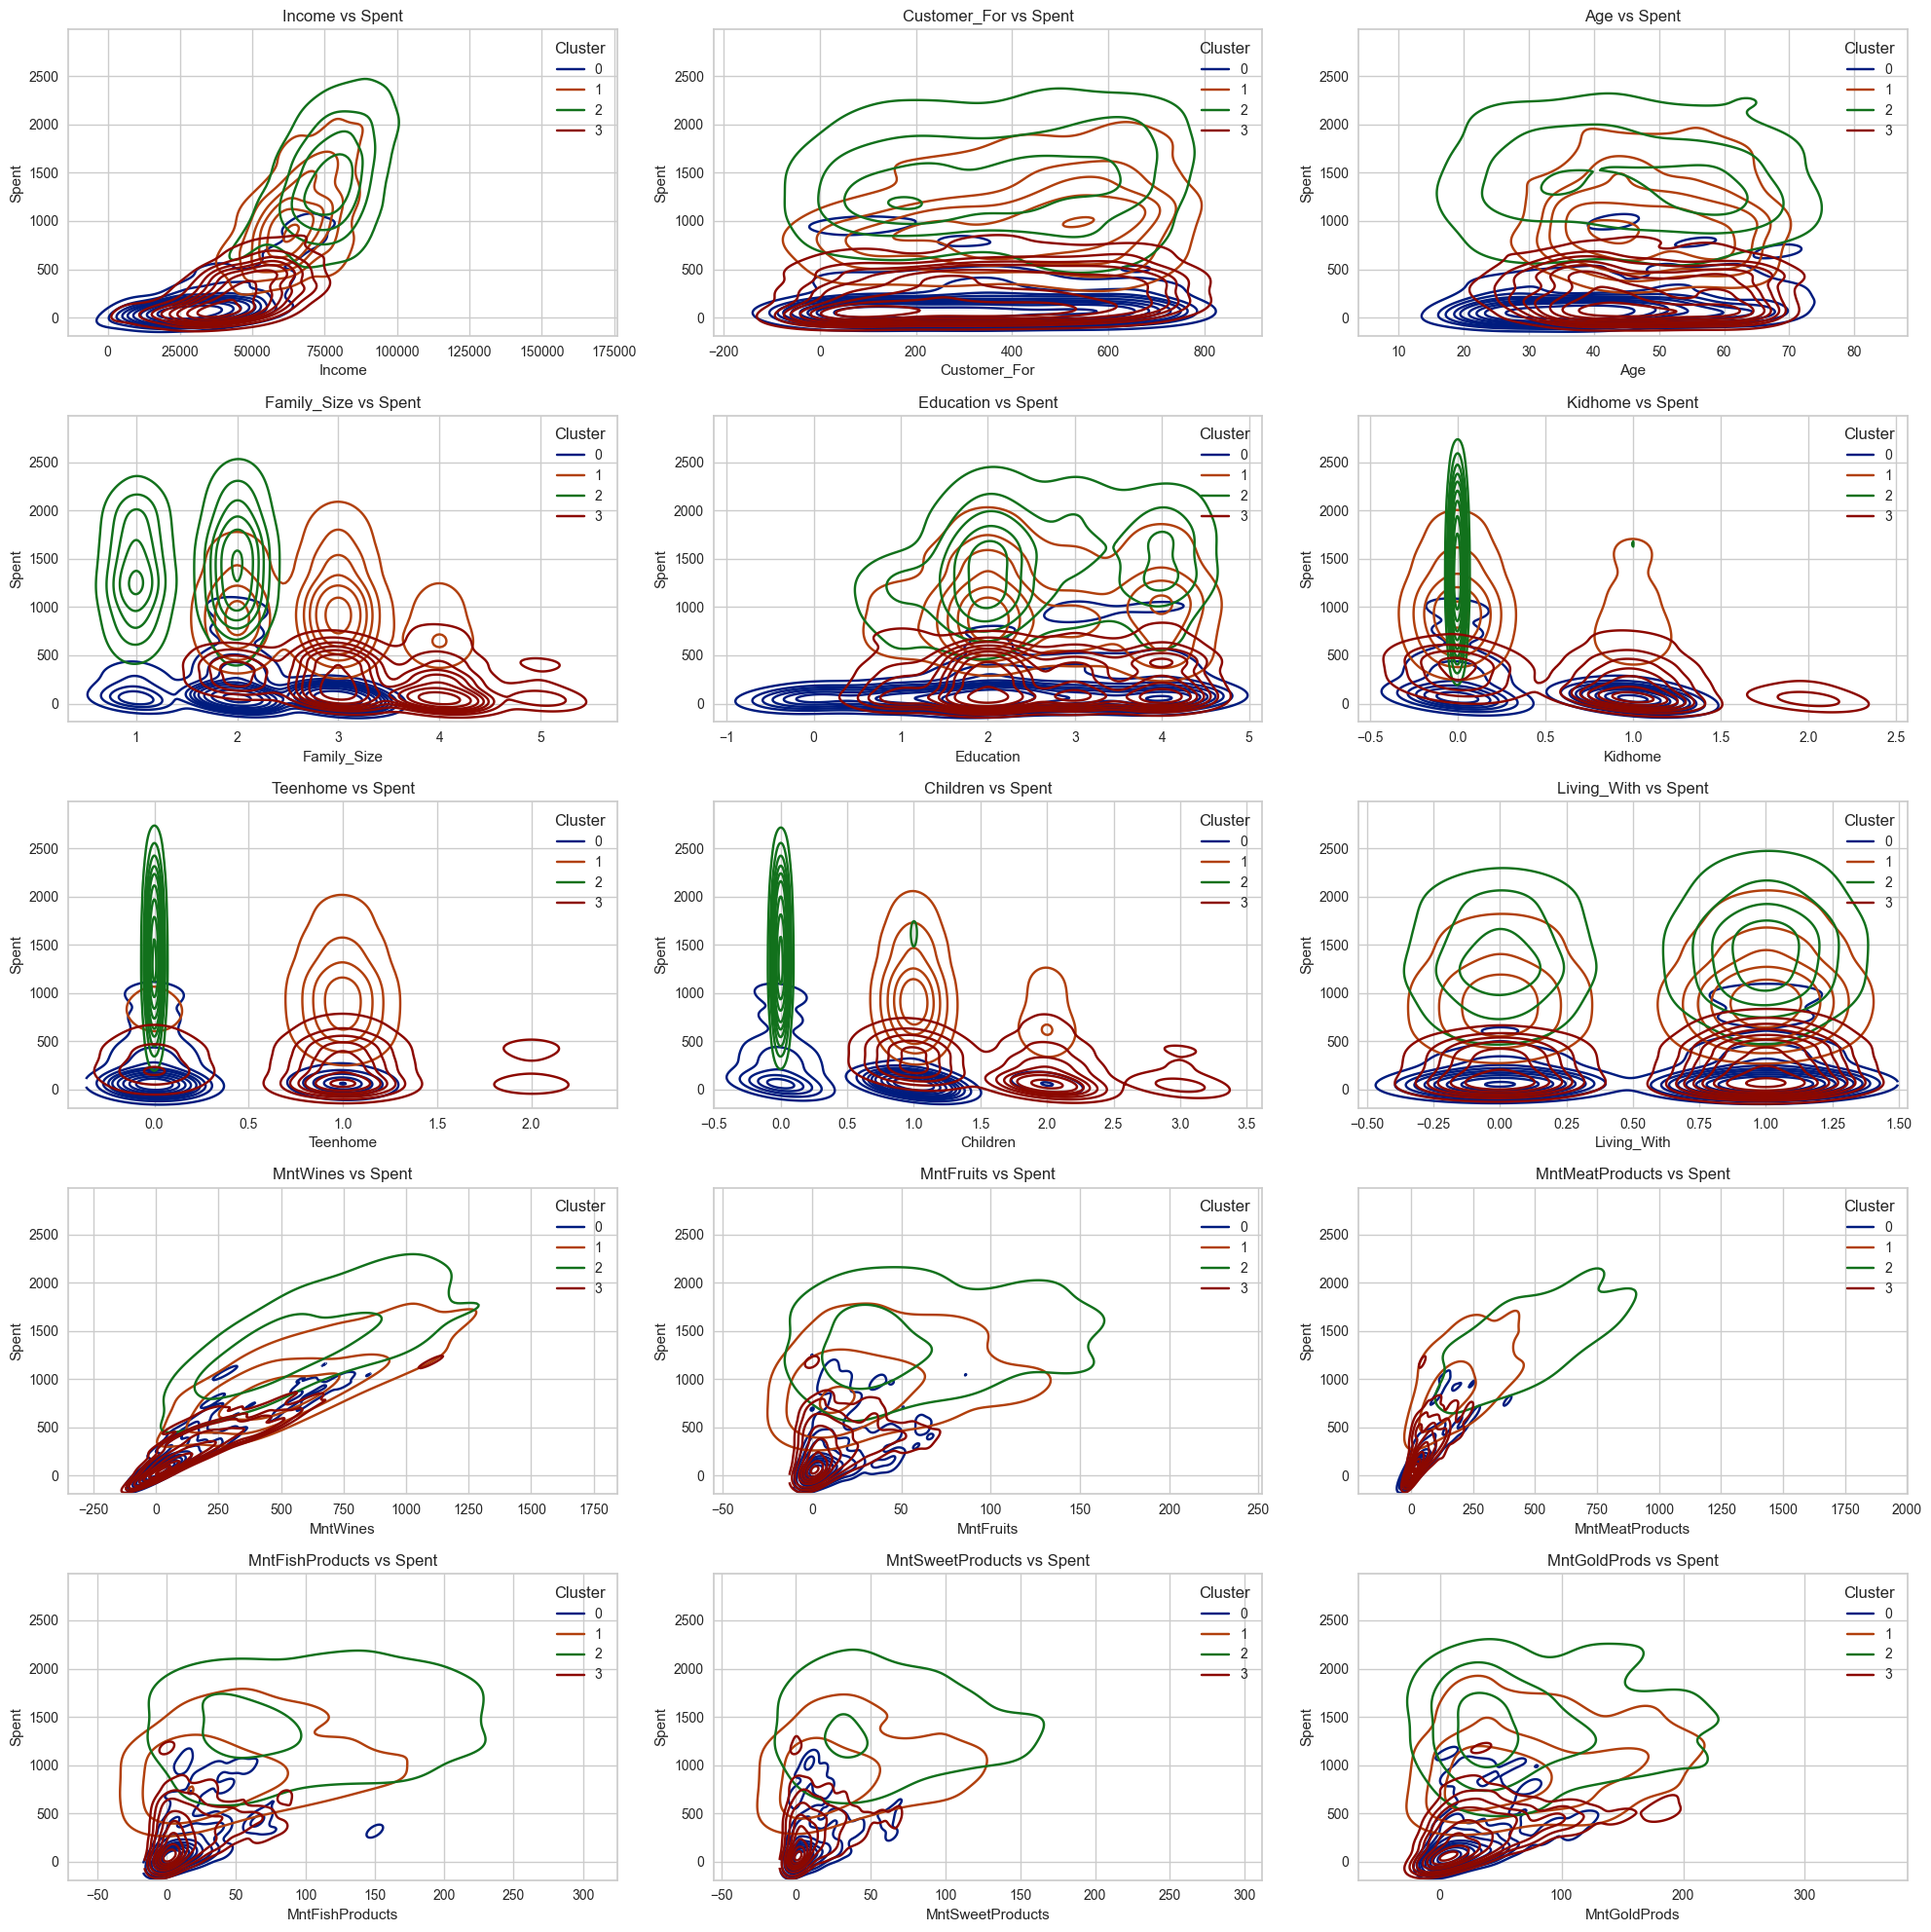

In [25]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata="Spent",
    cluster_col="Cluster"
)

# Nhận xét về mức chi tiêu của từng cụm

## Cụm số 2

- Thu nhập và chi tiêu cao nhất.
- Thường chưa có con, kích thước gia đình nhỏ (<=2).
- Trình độ học vấn từ trung bình đến cao.
- Chi tiêu đồng đều cho tất cả các mặt hàng, có xu hướng chi tiêu cao hơn nếu đang trong mối quan hệ yêu đương/hôn nhân.
- Các mặt hàng chi tiêu bao gồm: rượu, trái cây, thịt, cá, đồ ngọt, và vàng.

## Cụm số 1

- Thu nhập cao, chi tiêu cao.
- Thường có 1-2 con, kích thước gia đình lớn hơn cụm 2 (đa số là 2-3, có ít 4).
- Con thường ở độ tuổi thiếu niên, trình độ học vấn từ trung bình đến cao.
- Chi tiêu nhiều nhất cho vàng, sau đó là rượu, đồ ngọt, trái cây, cá, và cuối cùng là thịt.

## Cụm số 0

- Thu nhập và chi tiêu thấp nhất.
- Trình độ học vấn đa dạng, thường có 1 con.
- Chi tiêu cao hơn một chút nếu chưa có con.
- Ưu tiên chi tiêu cho vàng, sau đó là cá, trái cây, đồ ngọt, rượu, và thịt.

## Cụm số 3

- Thu nhập và chi tiêu thấp.
- Có nhiều con nhất (đa số là 1-2 con), trình độ học vấn trung bình cao.
- Có thể cần các sản phẩm hỗ trợ tài chính hoặc tiết kiệm chi phí.
- Chi tiêu cao nhất cho vàng, tiếp đến là rượu, và ít hơn cho các mặt hàng khác.

# Nhận xét chung về mức chi tiêu

- **Mức thu nhập và chi tiêu**: Mức thu nhập có ảnh hưởng rất lớn đến chi tiêu. Cụm 2 và cụm 1 có thu nhập cao, và chi tiêu của họ cũng cao so với 2 cụm còn lại.

- **So sánh cụm 2 và cụm 1**: Cụm 2 là tập hợp những người có học vấn cao, thu nhập cao và chưa có con, dẫn đến chi tiêu cao hơn so với cụm 1, nơi các gia đình đã có con.

- **Chi tiêu theo độ tuổi của con**: Đối với cụm 2, những gia đình có con ở độ tuổi thiếu niên có chi tiêu cao hơn gia đình có con ở độ tuổi thiếu nhi.

- **Ưu tiên chi tiêu cho vàng**: Vàng là mặt hàng được ưa chuộng nhất trong tất cả các cụm.

- **Chi tiêu cho rượu**: Rượu dễ tiếp cận được đến cụm 2 và cụm 1 hơn, có lẽ bởi đây là mặt hàng đắt đỏ, không quá thiết yếu, nên chỉ được mua nhiều bởi 2 cụm có thu nhập cao.

- **Chi tiêu của cụm 3 so với cụm 0**: Cụm 3 có chi tiêu về rượu cao hơn rõ rệt so với cụm 0, mặc dù các chi tiêu khác vẫn tương đương. Số lượng con có thể là một yếu tố quan trọng ảnh hưởng đến chi tiêu cho rượu của cụm 3, có thể đến từ các vấn đề về tâm lý, áp lực hoặc văn hóa xã hội.

# Kết luận

- **Ảnh hưởng của thu nhập đến chi tiêu**: Thu nhập là yếu tố quan trọng nhất ảnh hưởng đến mức độ chi tiêu. Các cụm có thu nhập cao (cụm 1 và cụm 2) chi tiêu nhiều hơn và có khả năng chi trả cho các mặt hàng xa xỉ như vàng và rượu, trong khi các cụm có thu nhập thấp (cụm 0 và cụm 3) có chi tiêu hạn chế hơn.

- **Tác động của cấu trúc gia đình**: Cấu trúc gia đình và số lượng con cái ảnh hưởng lớn đến mô hình chi tiêu. Cụm 2, với kích thước gia đình nhỏ và chưa có con, có xu hướng chi nhiều hơn ở tất cả các mặt hàng. Đây là cụm dễ quảng bá sản phẩm nhất, bởi họ có nhu cầu chi tiêu lớn và có thể ít đắn đo trong việc mua hàng. Trong khi đó, cụm 1, với gia đình lớn hơn, thu nhập cao tương tự và có con, có chi tiêu tập trung vào một số mặt hàng và ít hơn rõ rệt ở các mặt hàng còn lại.

- **Yếu tố tâm lý và văn hóa**: Số lượng con cái và áp lực tài chính có thể ảnh hưởng đến quyết định chi tiêu, đặc biệt là trong cụm 3, nơi rượu có thể được tiêu thụ nhiều hơn như một cách để đối phó với căng thẳng hoặc như một phần của văn hóa xã hội.

- **Chiến lược tiếp cận thị trường**: Hiểu rõ các đặc điểm và ưu tiên chi tiêu của từng cụm có thể giúp các doanh nghiệp và nhà hoạch định chính sách phát triển các chiến lược tiếp cận thị trường hiệu quả hơn, nhằm đáp ứng nhu cầu và tối ưu hóa lợi ích cho từng nhóm khách hàng khác nhau.

- **Sự khác biệt về ưu tiên chi tiêu**: Mặc dù vàng là mặt hàng được ưa chuộng nhất trong tất cả các cụm, sự ưu tiên chi tiêu cho các mặt hàng khác như rượu, đồ ngọt, trái cây, cá và thịt có sự khác biệt rõ rệt tùy thuộc vào thu nhập và cấu trúc gia đình.


In [26]:
Personal = ["Income", "Customer_For", "Age", "Family_Size", "Education", "Kidhome", "Teenhome", "Children", "Living_With"]

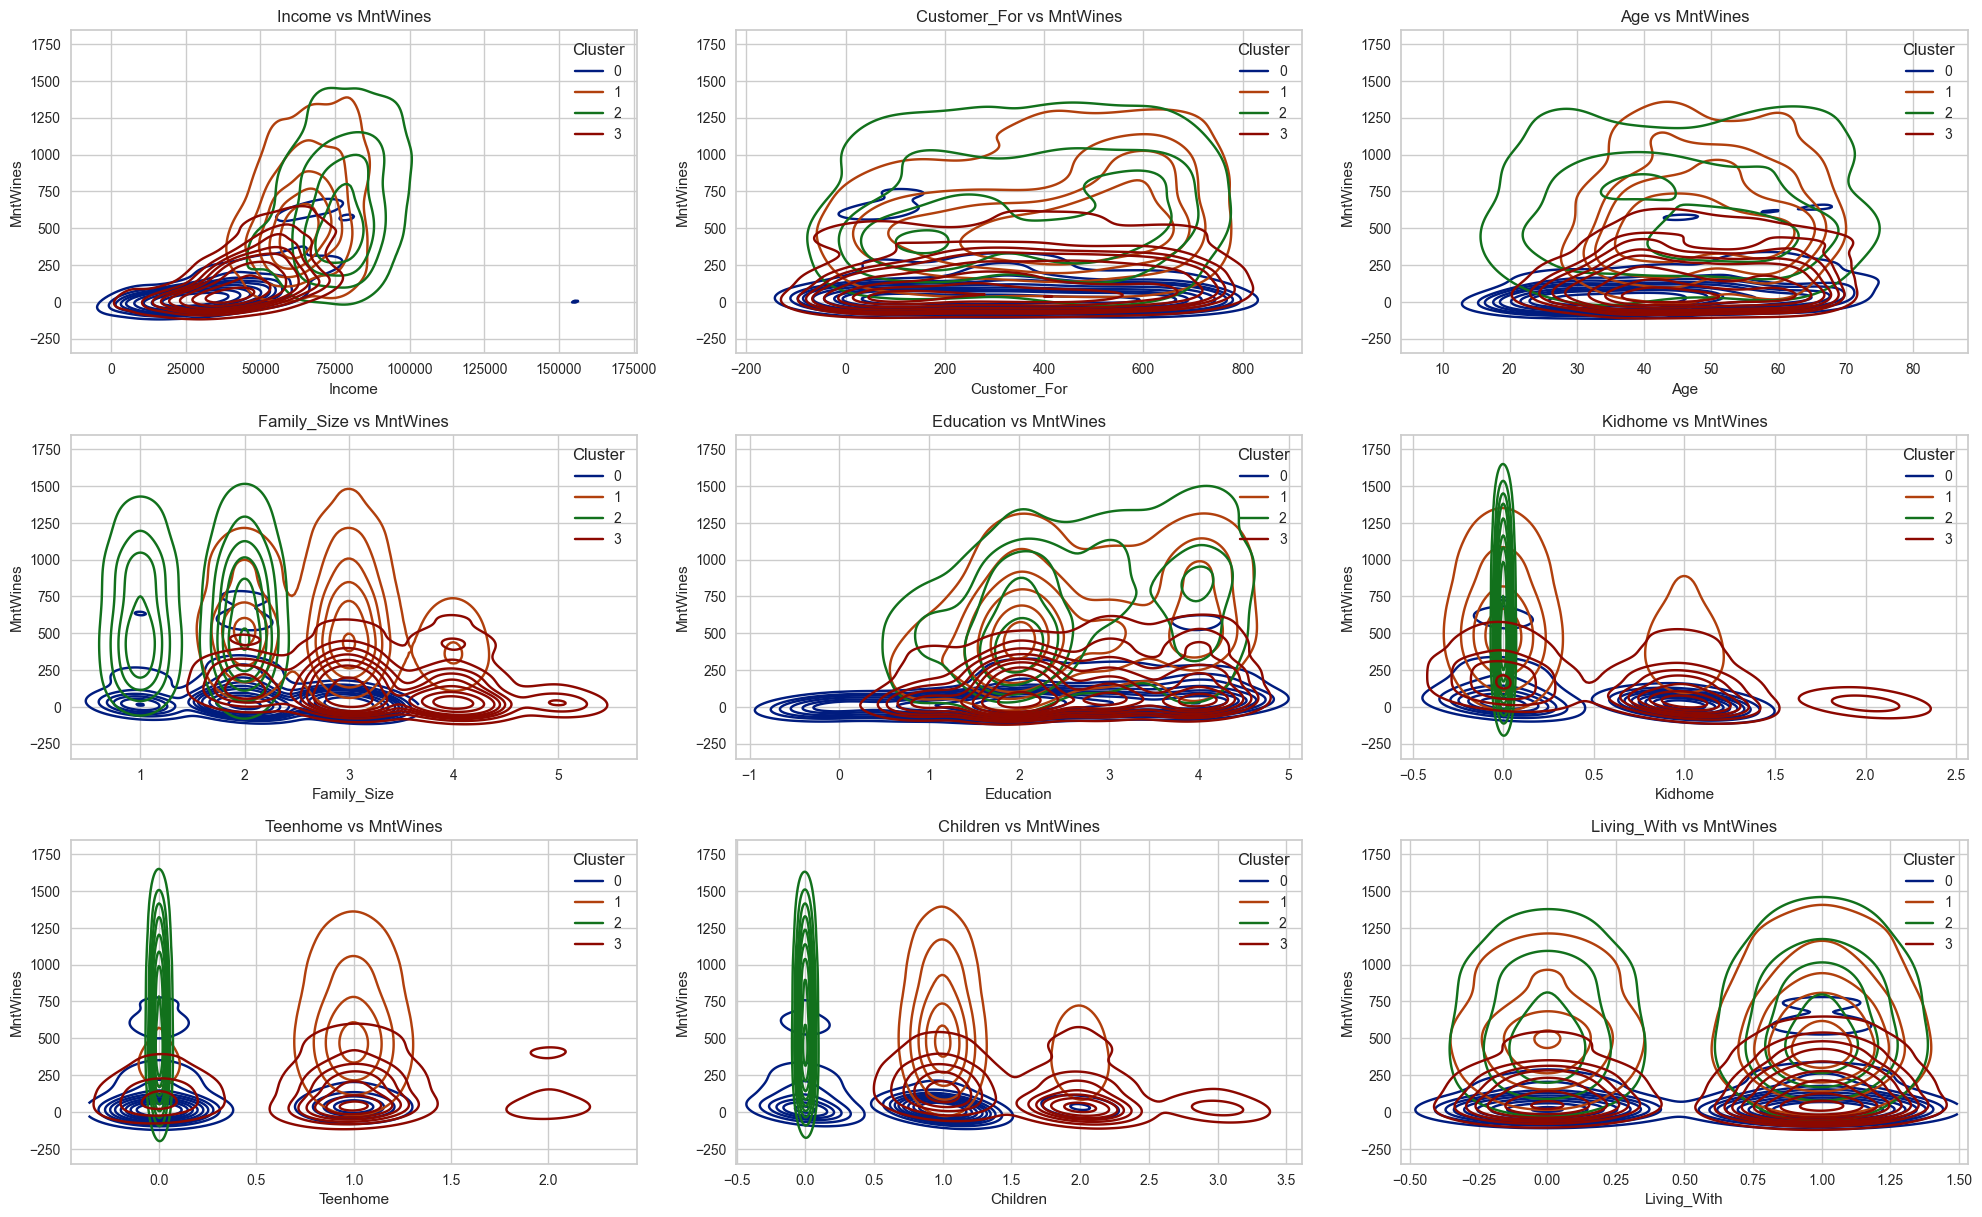

In [27]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata="MntWines",
    cluster_col="Cluster"
)

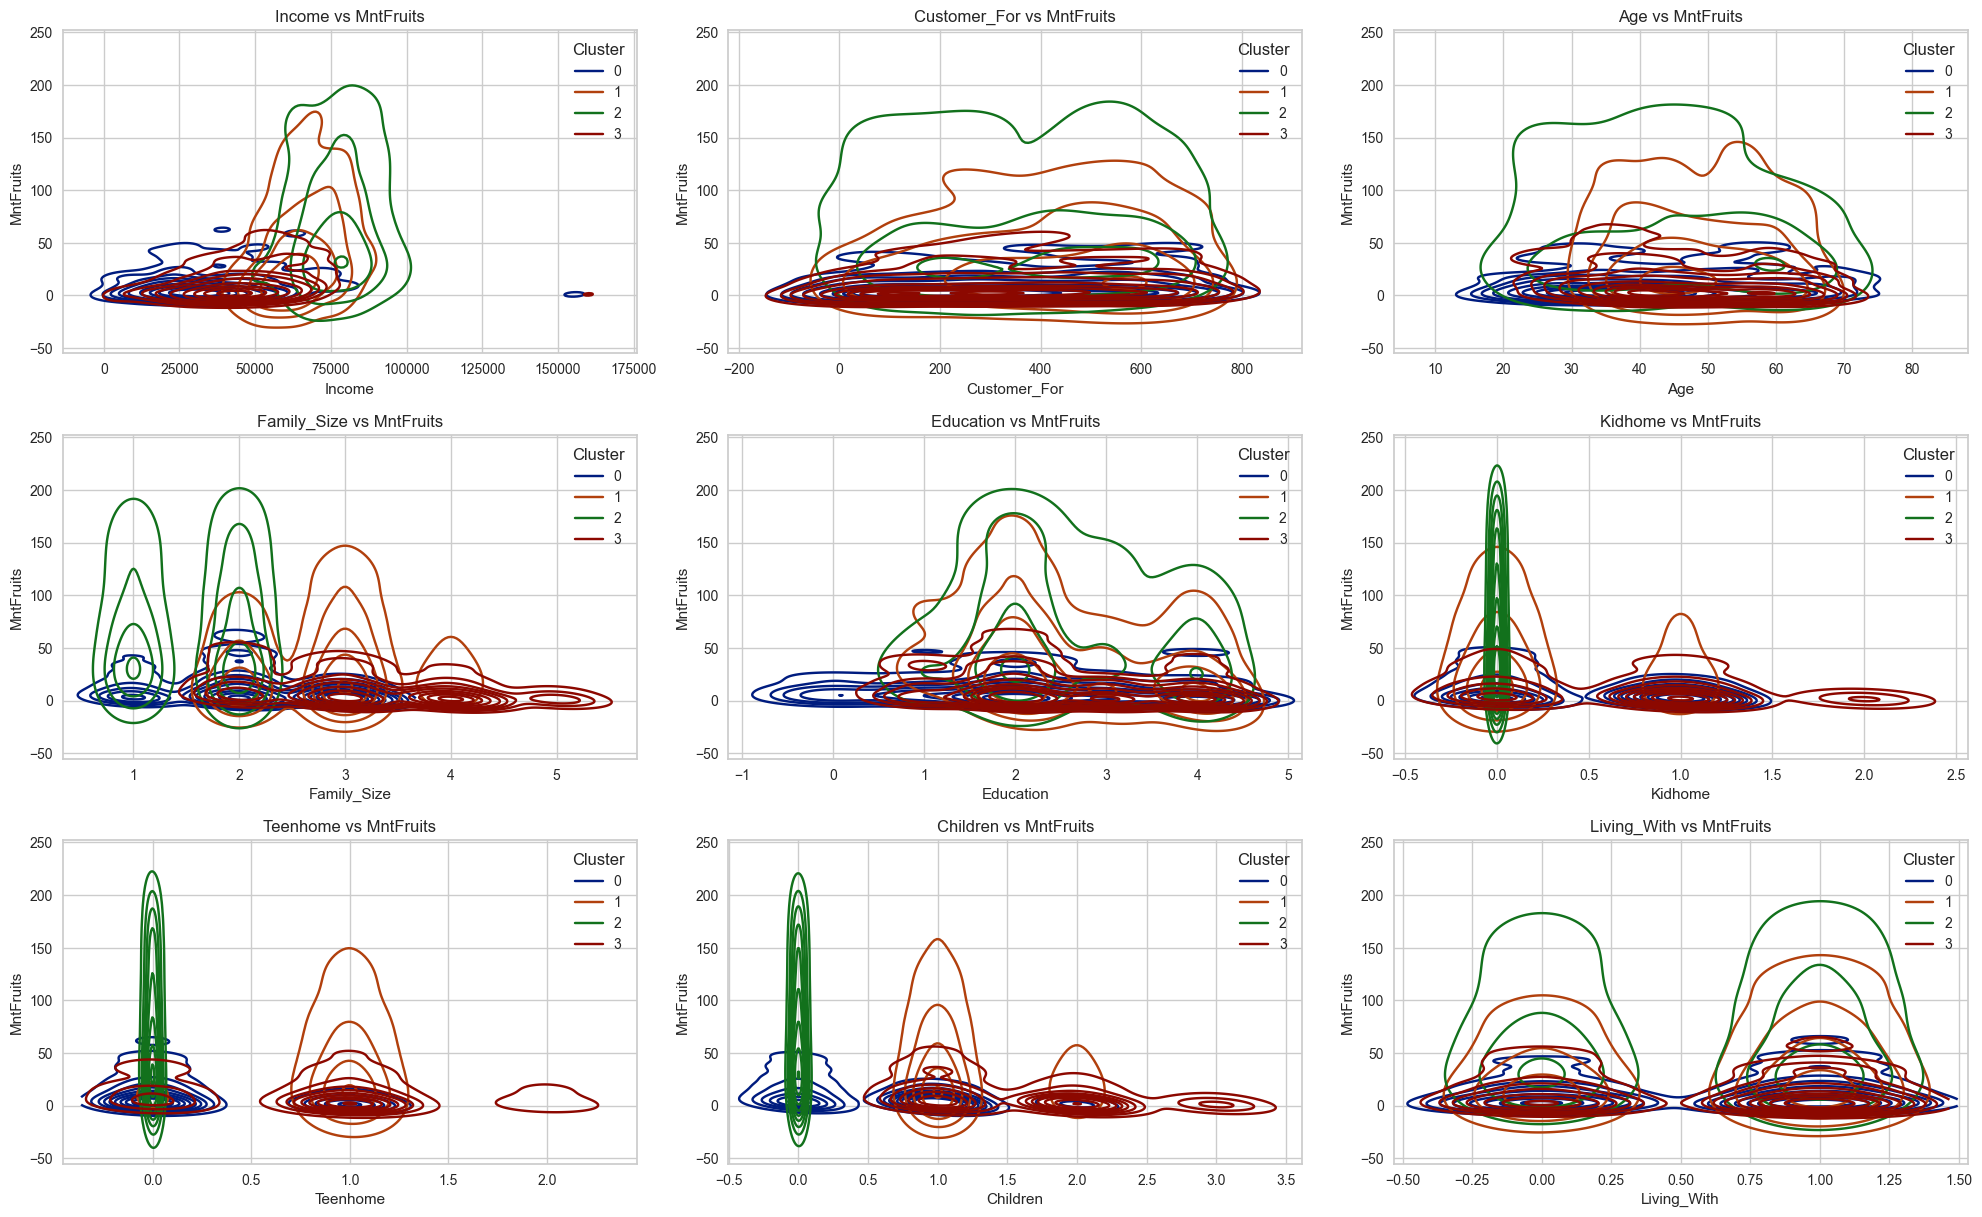

In [28]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata="MntFruits",
    cluster_col="Cluster"
)

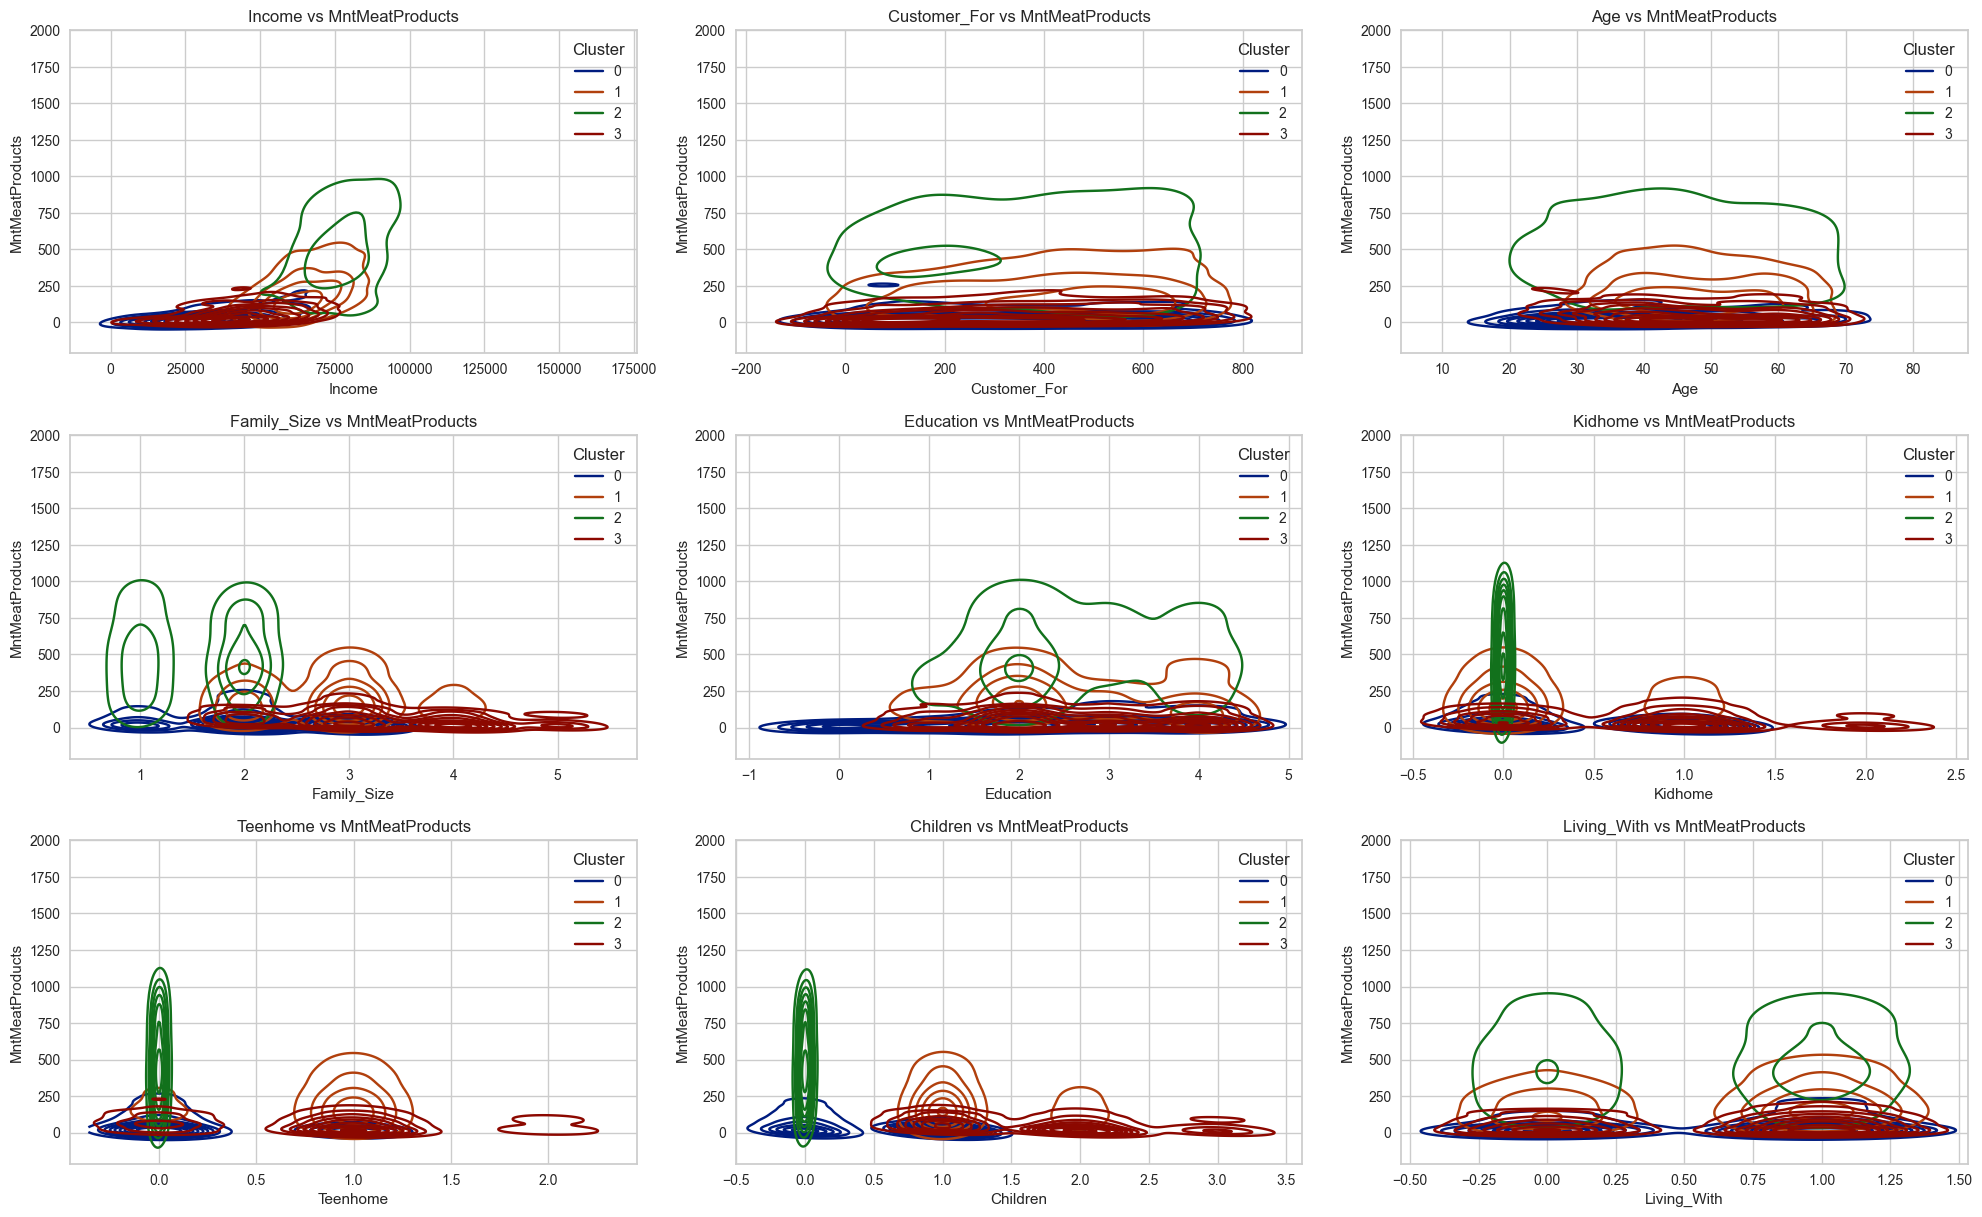

In [29]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata='MntMeatProducts',
    cluster_col="Cluster"
)

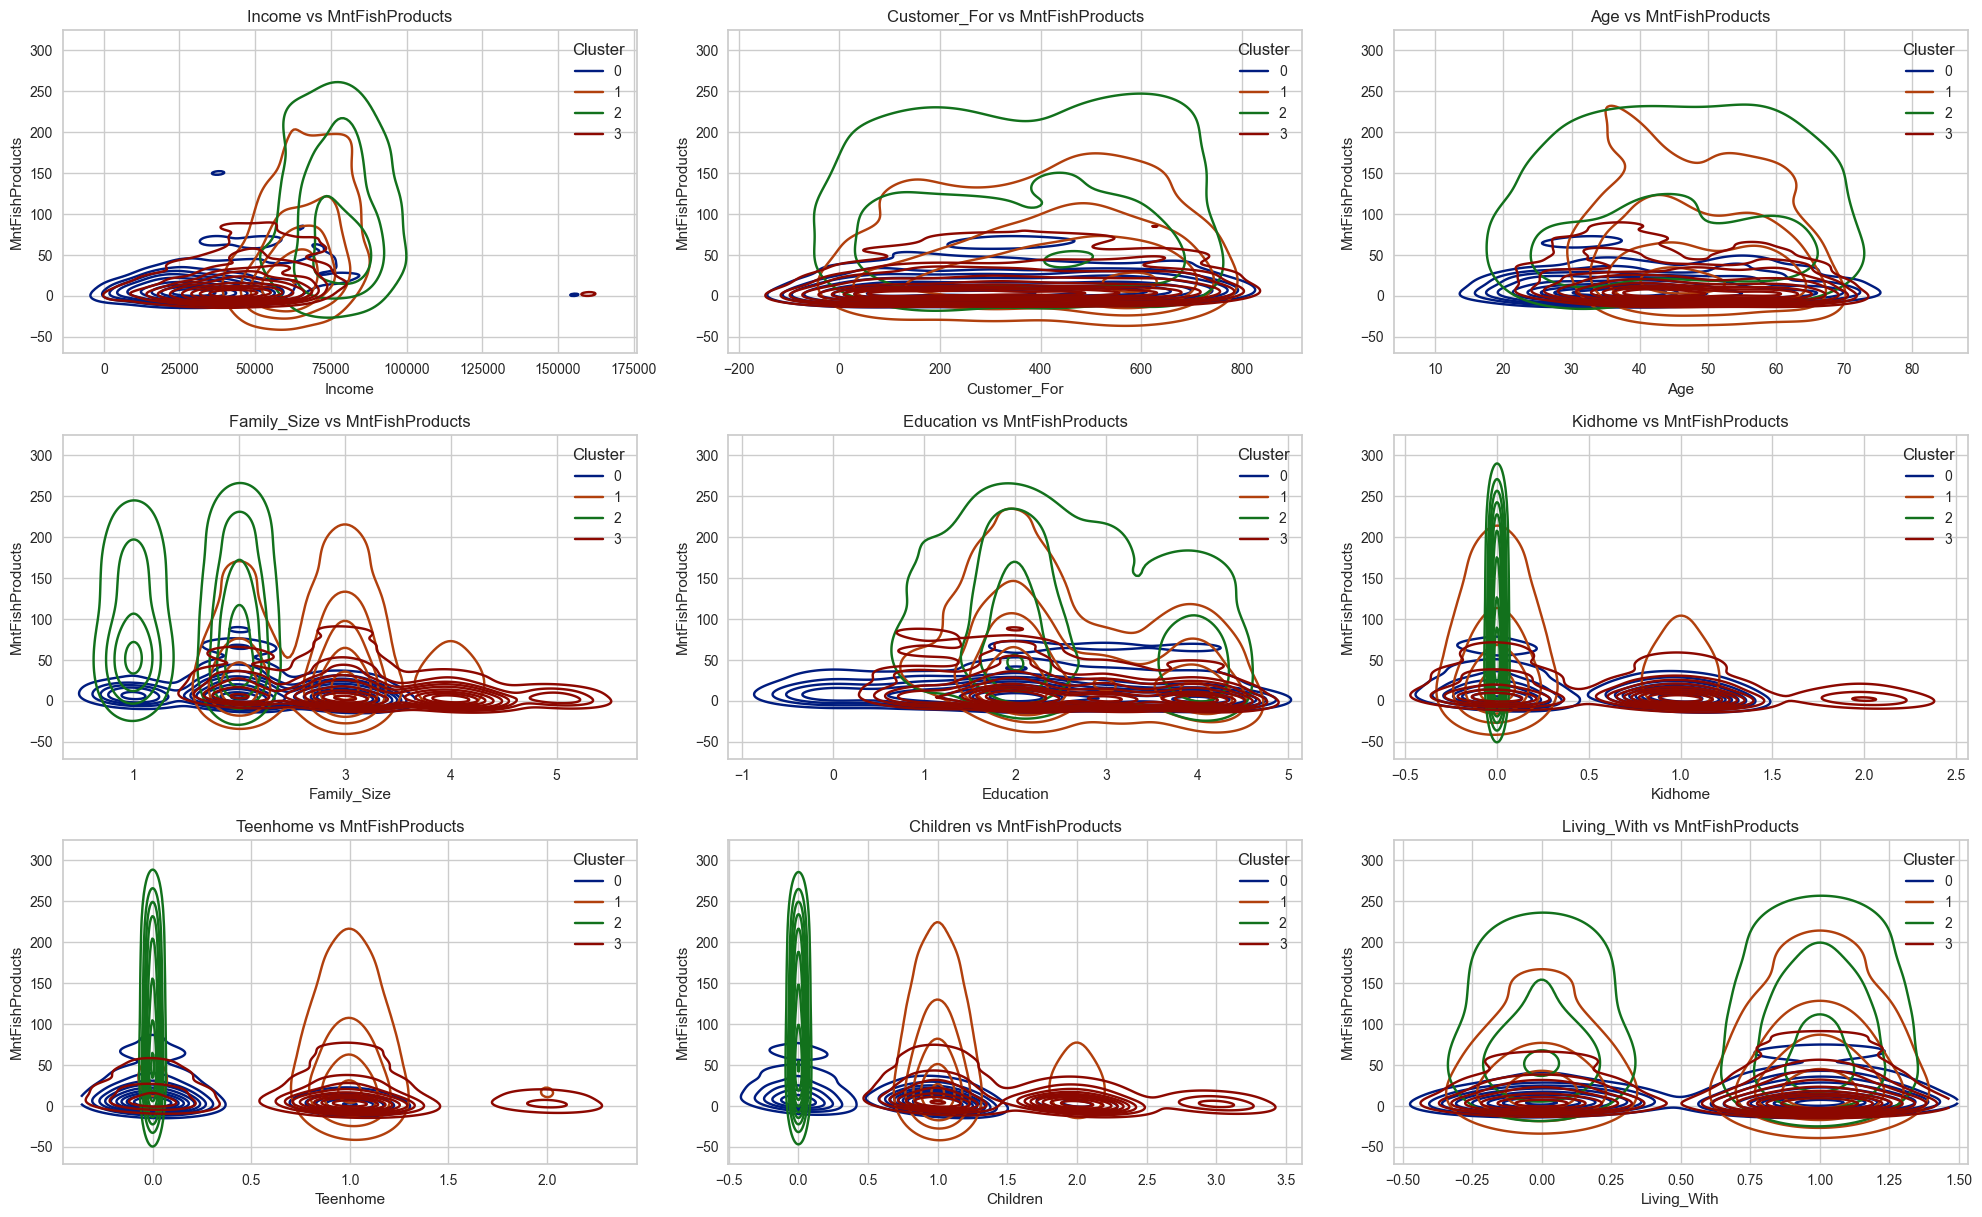

In [30]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata='MntFishProducts',
    cluster_col="Cluster"
)

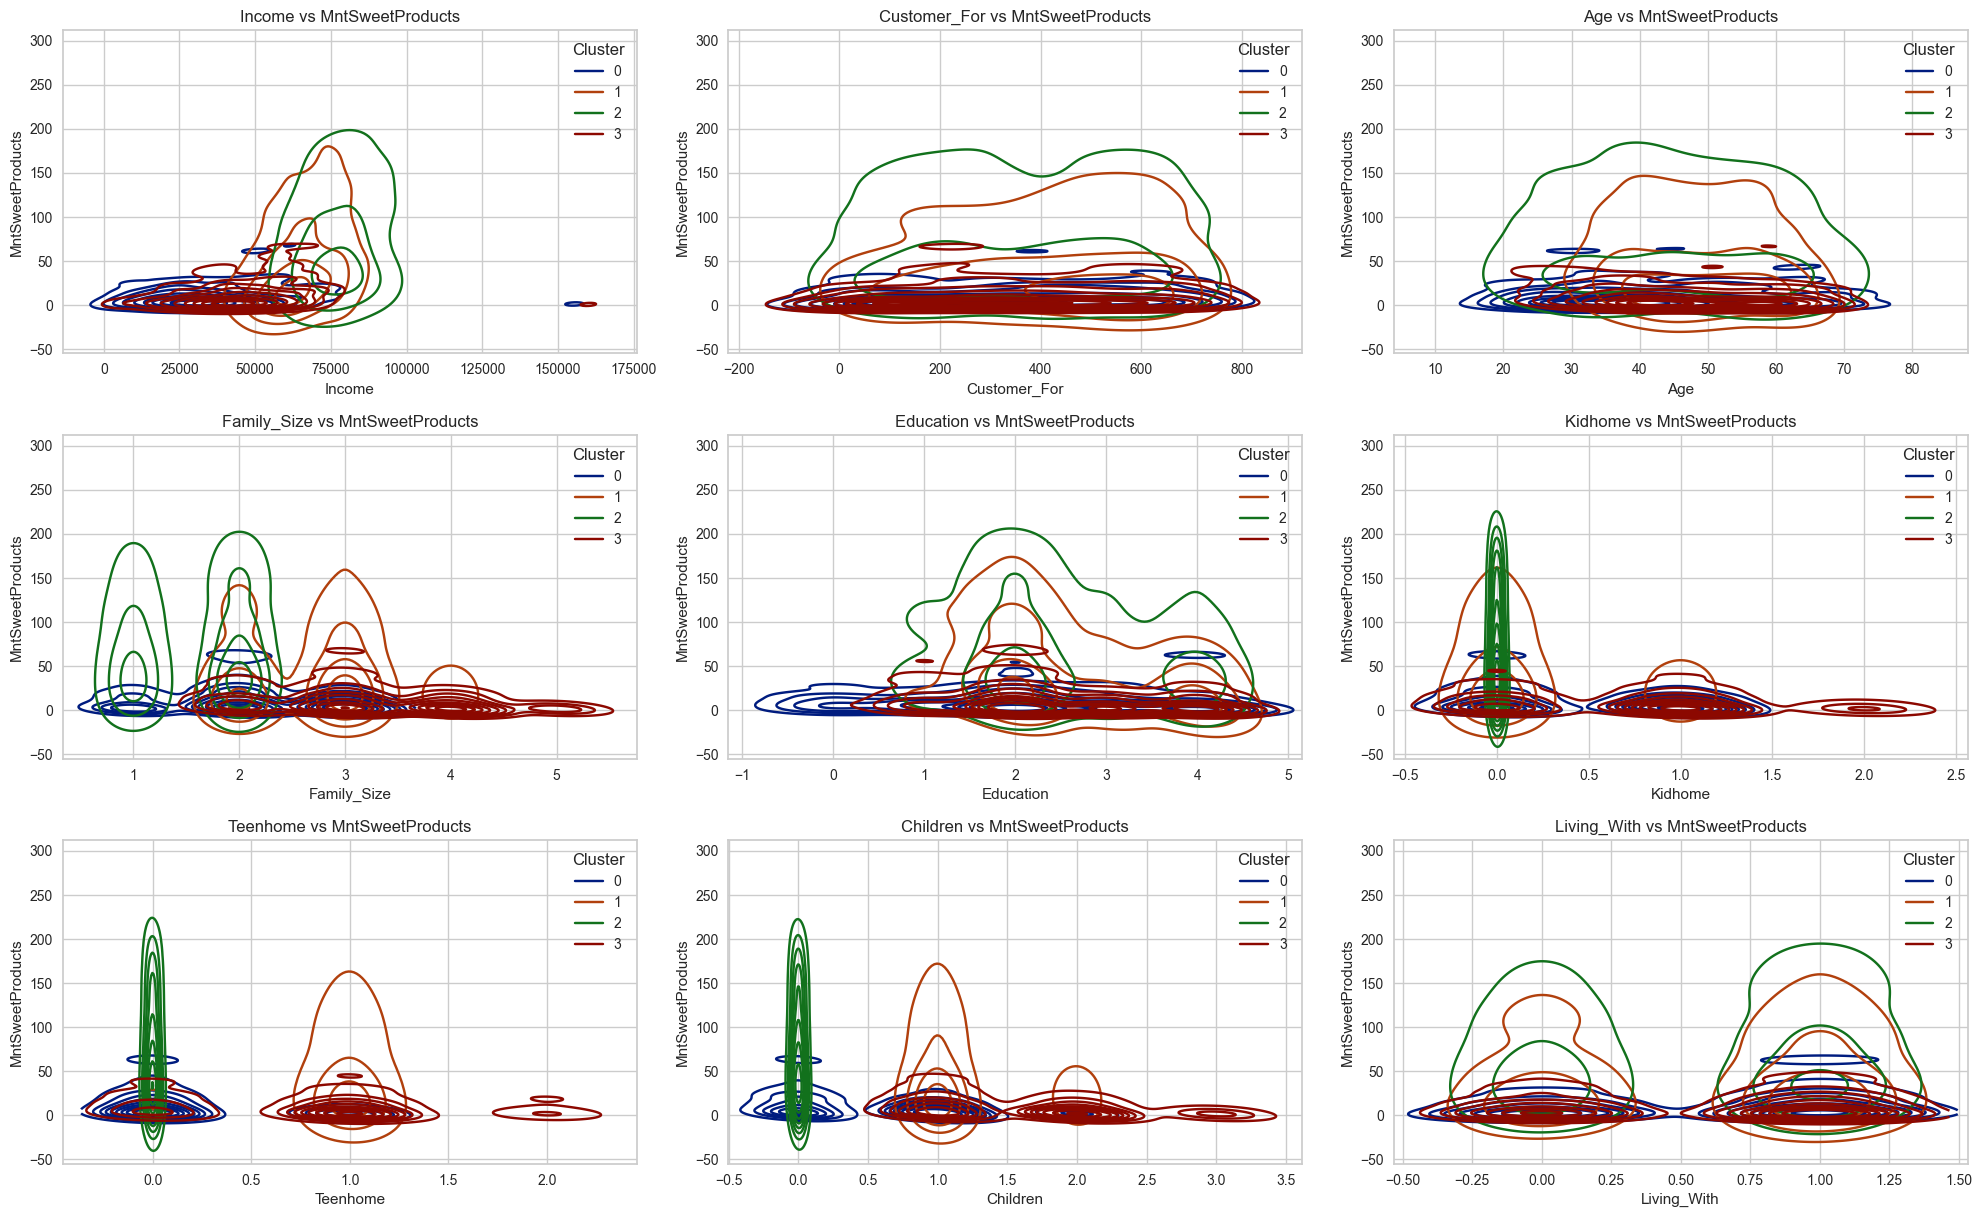

In [31]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata='MntSweetProducts',
    cluster_col="Cluster"
)

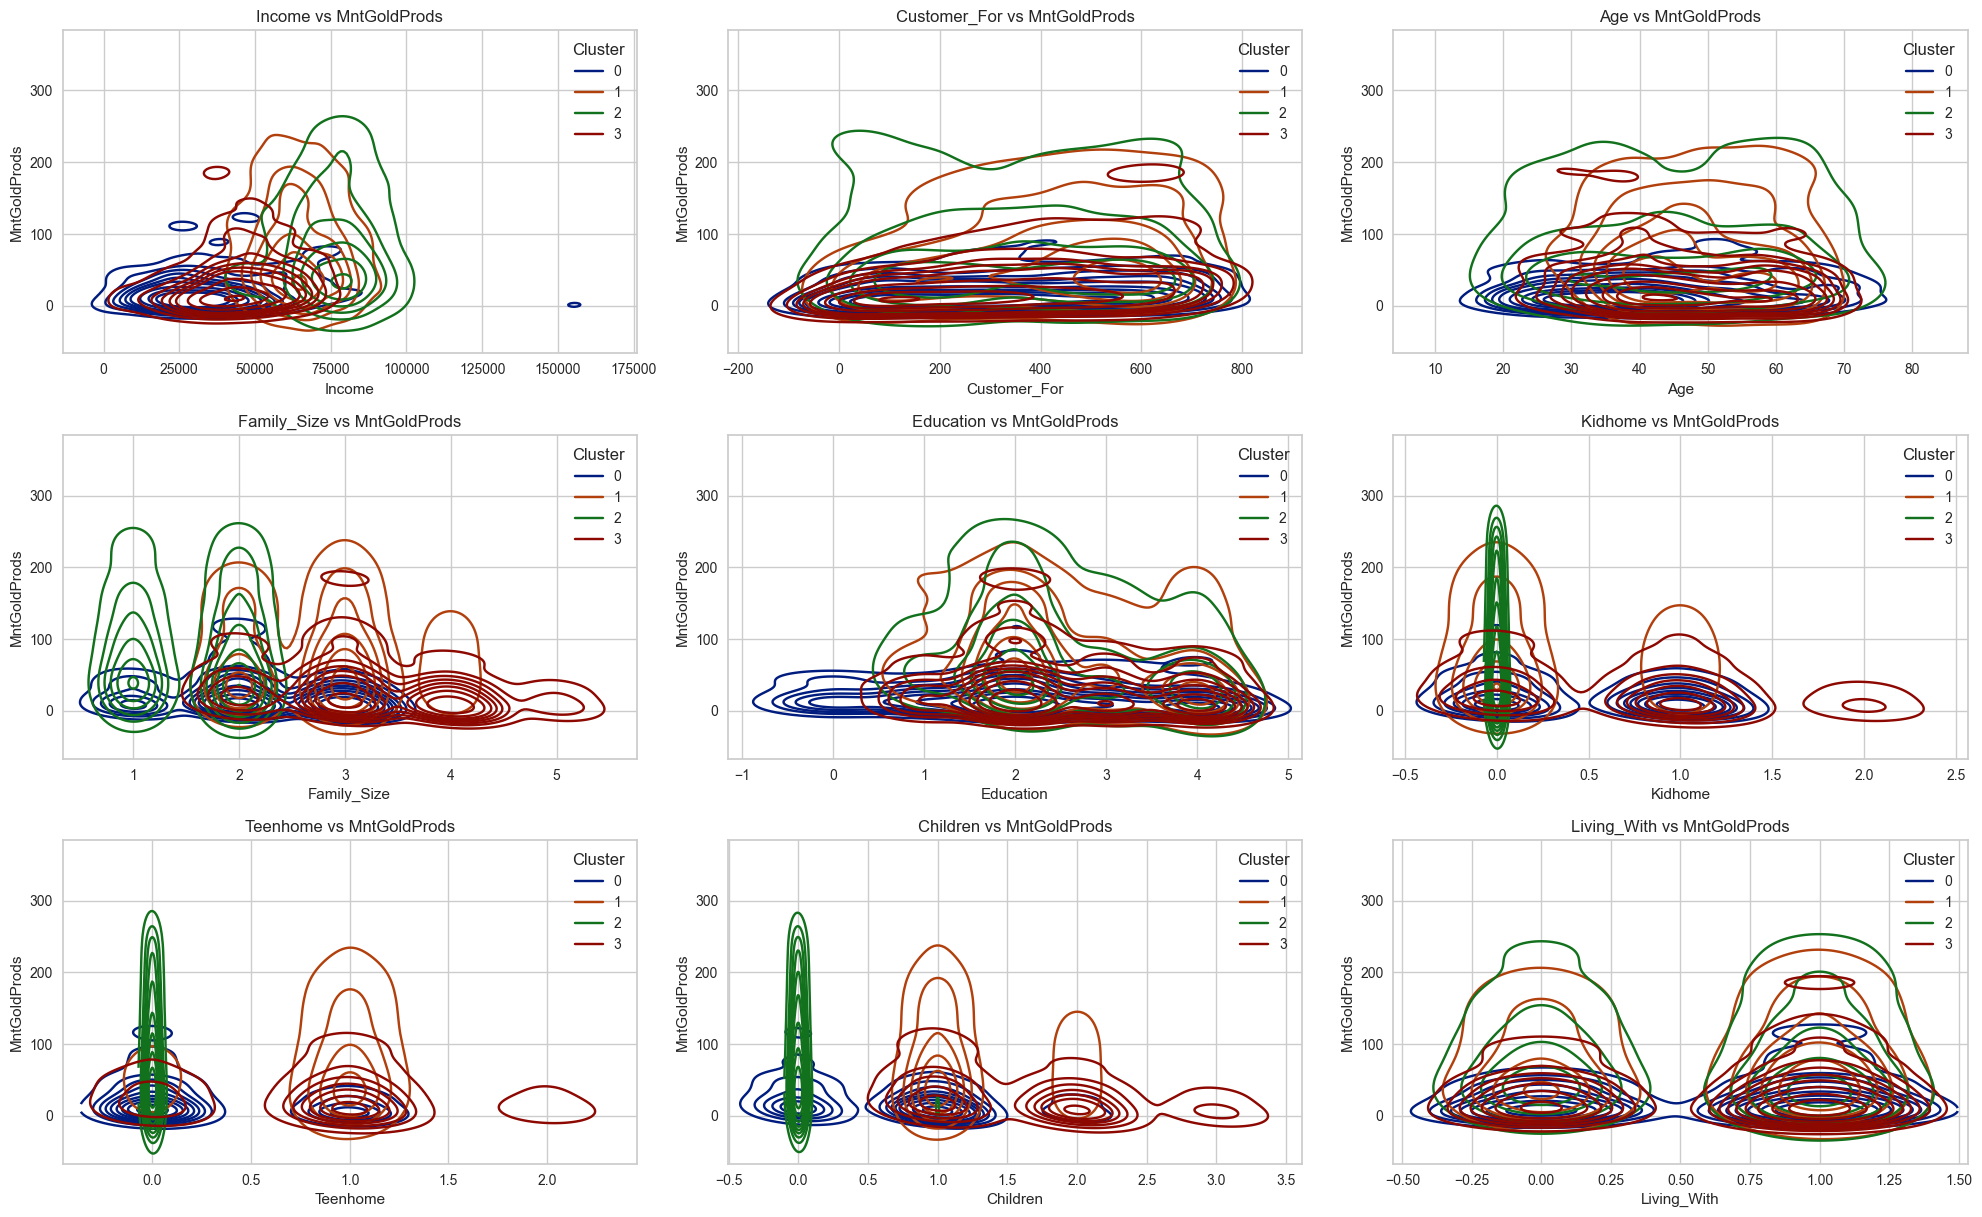

In [32]:
plot_kde_grid(
    data=raw_data,           
    personal_vars=Personal,  
    ydata='MntGoldProds',
    cluster_col="Cluster"
)